<h1>Palmer Penguins Data Set</h1>

<h3>Overview</h3>
This notebook contains a data analysis of the popular Palmer Penguins dataset. The dataset contains measurements of penguins of three species: Adélie, Chinstrap, and Gentoo. 

The dataset includes the following:
   
species: The species of penguin (Adélie, Chinstrap, or Gentoo).    
island: The island where the penguin was observed (Biscoe, Dream, or Torgersen).    
bill_length_mm: The length of the penguin's bill in millimeters.\
bill_depth_mm: The depth of the penguin's bill in millimeters.\
flipper_length_mm: The length of the penguin's flipper in millimeters.\
body_mass_g: The body mass of the penguin in grams.\
sex: The sex of the penguin (male, female, or NaN).

The datatypes used to decribe the above dataset are as follows:

The **String** datatype is most appropriate in this case for the variables **species, island, and sex**. This is due to these varibales containing only categorical data.\
The **Float** datatype is most appropriate in this case for the variables **bill_length_mm, bill_depth_mm, flipper_length_mm, and body_mass_g**. The primary reason for this choice is that even though flipper_length_mm and body_mass_g don't utilise decimal measurement it is more consistent to use Float for all of the above numerical values instead of mixing int and float. The other main reason for this choice is that once basic statistical analysis (mean & std for example) is applied to a large whole number dataset the result is likely more accurately descibed using a float. This can be seen below in the statistical overview (df.describe()).

***
<h4> Loading of Data, dependencies, statistical overview, and testing. </h4>

***

In [648]:
# Pandas and pyplot import - these libraries are used to plot and analyse the data further in this workbook.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [649]:
# Loading the penguins dataset directly from the source github repository and assigning to variable df, shorthand for dataframe.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [650]:
# Looking at dataset to ensure consistency.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [651]:
# Describe the data set. See below a statistical overview of dataset numerical variables.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [652]:
# First row displayed using iloc modifier. Testing of data.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [653]:
# Count the number of penguins of each sex. Testing of data.
df['sex'].value_counts()

sex
MALE      168
FEMALE    165
Name: count, dtype: int64

In [654]:
# Count the number of penguins of species. Testing of data.
df['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

***
<h4> Plotting of Data using pandas and matplotlib </h4>

***

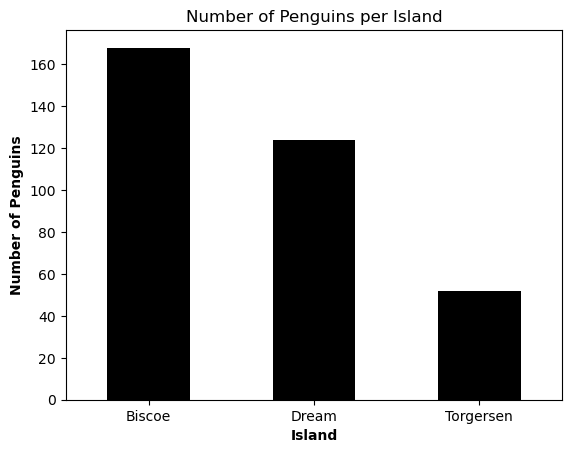

In [655]:
# Bar Chart showing number of penguins per island using pandas and pyplot

# Using pandas groupby method to group the data by island and count the number of penguins on each one.
penguins_per_island = df.groupby('island').size()

# Using pandas to .plot barchart
penguins_per_island.plot(kind='bar', color='black')

# Using matplotlib to add title and label axes.
plt.title('Number of Penguins per Island')
plt.xlabel('Island', fontweight='bold')
plt.xticks(rotation=0)
plt.ylabel('Number of Penguins', fontweight='bold')

# Showing the plot using matplotlib
plt.show()

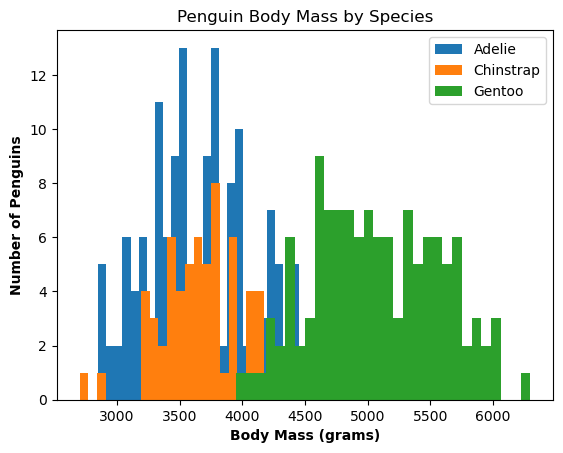

In [656]:
# Histogram showing the body mass of penguins by species using pandas and pyplot

# Using pandas groupby method to group the data by species and then by body mass.
penguin_mass_by_species = df.groupby('species')['body_mass_g']

# Using pandas to .plot histogram
penguin_mass_by_species.plot(kind='hist', bins=30, legend=True)

# Using matplotlib to add title and label axes.
plt.title('Penguin Body Mass by Species')
plt.xlabel('Body Mass (grams)', fontweight='bold')
plt.ylabel('Number of Penguins', fontweight='bold')

# Showing the plot using matplotlib
plt.show()


***
<h4> Correlation analysis </h4>

***

The below analysis aims to illustrate how correlated the bill length and the mass of the Gentoo penguin are, the rationale in using these variables are as follows:

-Body mass and bill length are one of the more intuitive variable pairs in the data from a readers perspective, the hypothesis being that, as the Gentoo penguins get more massive ('larger') their bills grow in a relative fashion.\
-Attempting to correlate data between species of penguin didn't seem appropriate as that would introduce a lot of noise into the plots and were deemed outside the scope of this analysis.\
-Gentoo penguins (illustrated above) were chosen as they have the widest range of body mass which enables a greater spread of data point in calculating correlation (r) with bill length.\
-The use of Adelie penguins was considered and could also have been justified as they are the most recorded in this data thus possibly leading to more complete data.




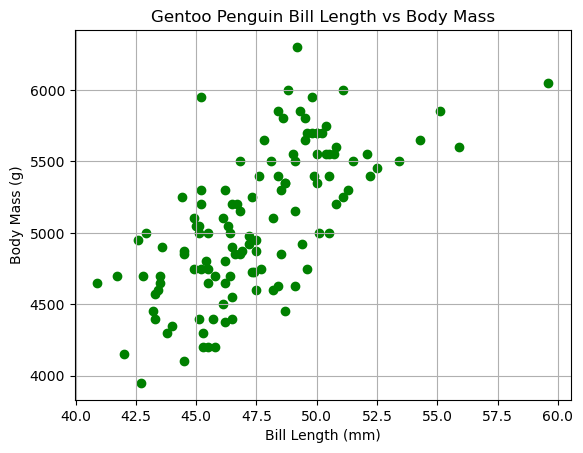

Correlation between Gentoo body mass and bill length: 0.6691661646930205


In [657]:
# Scatter chart showing the relationship between the body mass of Gentoo penguins and Gentoo bill length using pandas and pyplot.

# Dataset filtered to include Gentoo data only. Checks for values in the species column that equal Gentoo and then applies that check the whole dataset df.
gentoo_data = df[df['species'] == 'Gentoo']

# Once the Gentoo data has been broken out (above) the .corr method (Pearson's) is used to store the correlation between bill length and body mass in the 'r' variable.
r = gentoo_data['body_mass_g'].corr(gentoo_data['bill_length_mm'])

# Plotting the scatter using matplotlib
plt.scatter(gentoo_data['bill_length_mm'], gentoo_data['body_mass_g'], color='green')
plt.title('Gentoo Penguin Bill Length vs Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()
print("Correlation between Gentoo body mass and bill length:", r)


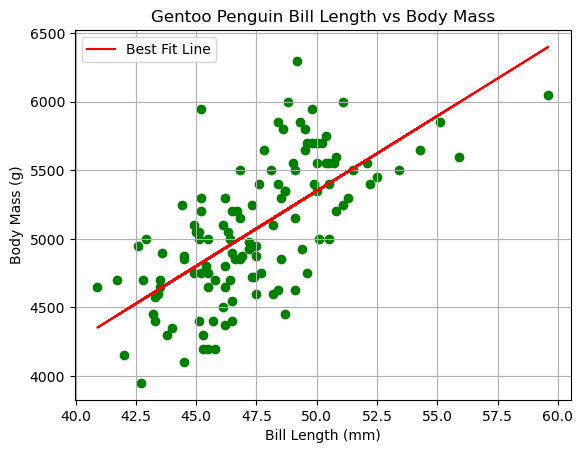

Correlation between Gentoo body mass and bill length: 0.6691661646930205


In [658]:
# dropna method used to fix polyfit errors by removing rows with missing values..
gentoo_data = gentoo_data.dropna(subset=['bill_length_mm', 'body_mass_g'])

# New scatter plot
plt.scatter(gentoo_data['bill_length_mm'], gentoo_data['body_mass_g'], color='green')
plt.title('Gentoo Penguin Bill Length vs Body Mass')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)

# Axes allocation to be used as arguments in polyfit function 
x = gentoo_data['bill_length_mm']
y = gentoo_data['body_mass_g']

# numpy polyfit method used to calculate and assign the slope (m) and the y intercept. Since this is a straight line 1 is used as the third argument.
m, b = np.polyfit(x, y, 1)  
# Best fit line plotted using linear equation for a stright line y = mx + b.
plt.plot(x, m*x + b, color='red', label='Best Fit Line') 

plt.legend()
plt.show()

print("Correlation between Gentoo body mass and bill length:", r)

Please see below the degrees of [correlation](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/pearsons-correlation-coefficient/):

-Perfect Correlation: Values near ±1 indicate a perfect correlation, where one variable’s increase (or decrease) is mirrored by the other.\
-High Degree: Values between ±0.50 and ±1 suggest a strong correlation.\
-Moderate Degree: Values between ±0.30 and ±0.49 indicate a moderate correlation.\
-Low Degree: Values below +0.29 are considered a weak correlation.\
-No Correlation: A value of zero implies no relationship.

The above analysis shows that the correlation coefficient between Gentoo body_mass_g & Gentoo bill_length_mm is .669, this would indicate that there is a high degree of correlation between these variables. This result is aligned with the correlation hypothesis outlined in the intro to this section.

***

### End